In [4]:
import pandas as pd 
england_df = pd.read_csv("data\\england_sample100.csv")
england_df 

# # # random 
# df_sample = england_df.sample(n=100000, random_state=42)  # random_state για αναπαραγωγιμότητα
# # # guardar 
# df_sample.to_csv("england_sample100.csv", index=False)

,Country,Area,Waterbody Type,Date,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values,CCME_WQI
0,England,MILTON BROOK D/S MILTON COOMBE,River,18-10-2012,0.0490,2.70,10.70,0.057,7.75,12.80,3.69,3.670,93.163163,Good
1,England,MEDWAY EAST FARLEIGH BRIDGE,River,08-04-2009,0.5000,6.00,10.20,0.500,7.78,11.46,4.40,4.500,74.337190,Fair
2,England,R WYE AT CARROTS POOL,River,26-08-2005,0.1450,1.00,9.41,0.025,8.11,17.00,0.98,0.931,100.000000,Excellent
3,England,MERRIOT STW,Effluent,16-06-2011,1.0000,6.00,8.82,0.327,7.54,16.47,5.75,5.720,75.505154,Fair
4,England,DIGGLE BROOK ABOVE CONFLUENCE WITH TAME,River,11-01-2006,0.0607,1.18,12.40,0.020,6.50,6.00,1.41,1.410,100.000000,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,England,HALIFAX WPC WORKS COMBINED FINAL EFF,Effluent,30-07-2008,0.1580,3.46,10.20,0.435,7.78,11.46,7.92,7.880,76.429361,Fair
99996,England,WOMBWELL (NEW) STW - TREATED SEWAGE,Effluent,05-06-2000,0.0480,3.50,10.20,0.144,7.17,11.46,5.00,4.500,89.633936,Good
99997,England,STRESSHOLME (DARLINGTON) STW,Effluent,31-08-2004,4.9700,12.00,10.20,4.520,7.78,11.46,14.90,14.500,44.588985,Poor
99998,England,EVERSHOT STW FE,Effluent,04-02-2021,0.2000,6.00,10.20,0.144,8.00,11.46,5.00,4.500,89.633936,Good


In [5]:
england_df["Area"].value_counts()


Area
MISC RIVER SAMPLES LUNE/WYRE                148
RIVER BROCK AT A6 ROAD  BRIDGE              121
RIVER WYRE AT ST MICHAELS                   106
DACRE BECK AT DACRE BRIDGE                  100
RIVER EDEN AT SHEEPMOUNT                     73
                                           ... 
RIVER WAVER U/S ABBEY HOUSE                   1
SAMUK WIREGILL MINE                           1
THAMES AT CLIFTON HAMPDEN BRIDGE              1
SLAUGHTER PIKE GARAGE STW :BOURTON-ON-TH      1
STILLINGTON BK AT MOORDALE BOTTOM FARM        1
Name: count, Length: 24860, dtype: int64

In [6]:
england_df["Waterbody Type"].value_counts()


Waterbody Type
River        63297
Effluent     28329
Estuarine     2346
Lake          1629
Sea Water     1481
Canal         1355
Sewage        1069
Drainage       477
Marine          17
Name: count, dtype: int64

In [7]:
england_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Country                           100000 non-null  object 
 1   Area                              100000 non-null  object 
 2   Waterbody Type                    100000 non-null  object 
 3   Date                              100000 non-null  object 
 4   Ammonia (mg/l)                    100000 non-null  float64
 5   Biochemical Oxygen Demand (mg/l)  100000 non-null  float64
 6   Dissolved Oxygen (mg/l)           100000 non-null  float64
 7   Orthophosphate (mg/l)             100000 non-null  float64
 8   pH (ph units)                     100000 non-null  float64
 9   Temperature (cel)                 100000 non-null  float64
 10  Nitrogen (mg/l)                   100000 non-null  float64
 11  Nitrate (mg/l)                    100000 non-null  fl

##### EDA quality of River, Effluent, Estuarine, Lake

In [8]:
# Selección de columnas numéricas
numeric_df = england_df.select_dtypes(include=['float64', 'int64'])

# Cálculo de la matriz de correlación
correlation_matrix = numeric_df.corr()


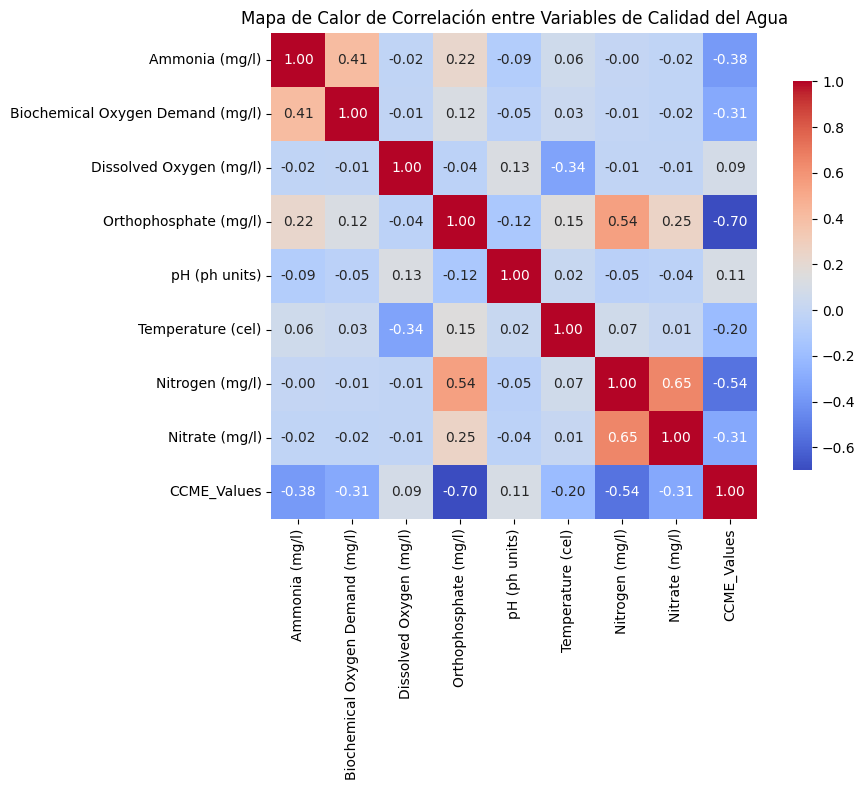

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": 0.8})
plt.title("Mapa de Calor de Correlación entre Variables de Calidad del Agua")
plt.tight_layout()
plt.show()


In [10]:

selected_types = ['River', 'Effluent', 'Estuarine', 'Lake',"Sewage"]
filtered_england_df = england_df[england_df['Waterbody Type'].isin(selected_types)].copy()

grouped_stats = filtered_england_df.groupby('Waterbody Type').agg({
    'Ammonia (mg/l)': ['mean', 'std', 'median'],
    'Biochemical Oxygen Demand (mg/l)': ['mean', 'std', 'median'],
    'Dissolved Oxygen (mg/l)': ['mean', 'std', 'median'],
    'Orthophosphate (mg/l)': ['mean', 'std', 'median'],
    'pH (ph units)': ['mean', 'std', 'median'],
    'Temperature (cel)': ['mean', 'std', 'median'],
    'Nitrogen (mg/l)': ['mean', 'std', 'median'],
    'Nitrate (mg/l)': ['mean', 'std', 'median'],
    'CCME_Values': ['mean', 'std', 'median']
})
grouped_stats

Ammonia (mg/l)                    \
                         mean        std median   
Waterbody Type                                    
Effluent             3.436067   8.937659  0.606   
Estuarine            0.379789   2.201382  0.098   
Lake                 0.591616   3.398446  0.098   
River                0.540292   4.519618  0.051   
Sewage              12.472565  13.504947  7.250   

               Biochemical Oxygen Demand (mg/l)                    \
                                           mean        std median   
Waterbody Type                                                      
Effluent                               8.384677  17.093609   4.28   
Estuarine                              3.327442  10.531428   2.70   
Lake                                   5.006568  16.686665   2.70   
River                                  3.482174  11.180071   2.70   
Sewage                                89.297920  85.375082  61.00   

               Dissolved Oxygen (mg/l)                  Orthophosphate (mg/l)  \
                                  mean       std median                  mean   
Waterbody Type                                                                  
Effluent                     10.206939  0.849956   10.2              2.237642   
Estuarine                     9.810699  1.616479   10.2              0.404760   
Lake                         10.335842  1.710796   10.2              0.282785   
River                        10.262433  1.783716   10.2              0.346261   
Sewage                       10.199768  0.913884   10.2              2.083430   

                ... Temperature (cel) Nitrogen (mg/l)                   \
                ...            median            mean       std median   
Waterbody Type  ...                                                      
Effluent        ...             11.46        9.948537  8.738775   5.00   
Estuarine       ...             12.80        4.588088  3.895868   5.00   
Lake            ...             11.46        3.766917  3.800840   5.00   
River           ...             11.40        5.394458  4.775901   4.81   
Sewage          ...             11.46        6.474886  5.862711   5.00   

               Nitrate (mg/l)                  CCME_Values             \
                         mean       std median        mean        std   
Waterbody Type                                                          
Effluent             6.941860  6.588615    4.5   66.712363  19.179430   
Estuarine            4.158925  3.173601    4.5   85.493753  12.452985   
Lake                 3.730584  3.171455    4.5   88.169744  12.105452   
River                5.113293  4.316994    4.5   87.042563  13.594409   
Sewage               4.592601  5.201203    4.5   53.286309  13.474200   

                           
                   median  
Waterbody Type             
Effluent        67.998049  
Estuarine       89.633936  
Lake            89.633936  
River           90.226168  
Sewage          47.881181  

[5 rows x 27 columns]

In [11]:
filtered_england_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96670 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96670 non-null  object 
 1   Area                              96670 non-null  object 
 2   Waterbody Type                    96670 non-null  object 
 3   Date                              96670 non-null  object 
 4   Ammonia (mg/l)                    96670 non-null  float64
 5   Biochemical Oxygen Demand (mg/l)  96670 non-null  float64
 6   Dissolved Oxygen (mg/l)           96670 non-null  float64
 7   Orthophosphate (mg/l)             96670 non-null  float64
 8   pH (ph units)                     96670 non-null  float64
 9   Temperature (cel)                 96670 non-null  float64
 10  Nitrogen (mg/l)                   96670 non-null  float64
 11  Nitrate (mg/l)                    96670 non-null  float64
 12  CCME_Valu

In [12]:
filtered_england_df["Waterbody Type"].value_counts()

Waterbody Type
River        63297
Effluent     28329
Estuarine     2346
Lake          1629
Sewage        1069
Name: count, dtype: int64

In [13]:
lake_area_counts = filtered_england_df[filtered_england_df["Waterbody Type"] == "Lake"]["Area"].value_counts().reset_index()
lake_area_counts.columns = ["Lake Area", "Number of Records"]

lake_area_counts.reset_index(drop=True, inplace=True)

lake_area_counts.head(50)


,Lake Area,Number of Records
0,WINDERMERE SOUTH BASIN,25
1,ELTERWATER (INNER BASIN),17
2,HANNINGFIELD RESERVOIR,16
3,GRASMERE LAKE BUOY 1,16
4,WROXHAM BROAD YACHT HOUSE PIER (R.BURE),14
5,WINDERMERE NORTH BASIN,14
6,CONISTON,14
7,BRADGATE BROOK - CROPSTON RESERVOIR,14
8,LOWESWATER AS PART OF A WQ SURVEY,12
9,COMBER MERE ON A525 TO WHITCHURCH,12


In [14]:
area_counts_by_type = (
    filtered_england_df
    .groupby(['Waterbody Type', 'Area'])
    .size()
    .reset_index(name='Number of Records')
    .sort_values(['Waterbody Type', 'Number of Records'], ascending=[True, False])
)

area_counts_by_type


,Waterbody Type,Area,Number of Records
4872,Effluent,POOLE STW FE (OUTFALLS 1 AND 2 COMBINED),43
3141,Effluent,HOWDON STW SECONDARY TREATED SEWAGE,41
1370,Effluent,CHRISTCHURCH STW FE,36
5332,Effluent,SALISBURY STW FE,34
343,Effluent,AYCLIFFE STW NORTH,33
...,...,...,...
24590,Sewage,WRANGATON ROYAL NAVAL STORES DEPOT,1
24591,Sewage,WRANGBROOK (UPTON) WPC WORKS TERTIARY,1
24592,Sewage,WWT 5,1
24593,Sewage,YENWORTHY LODGE SEWAGE PLANT DISCHARGE,1


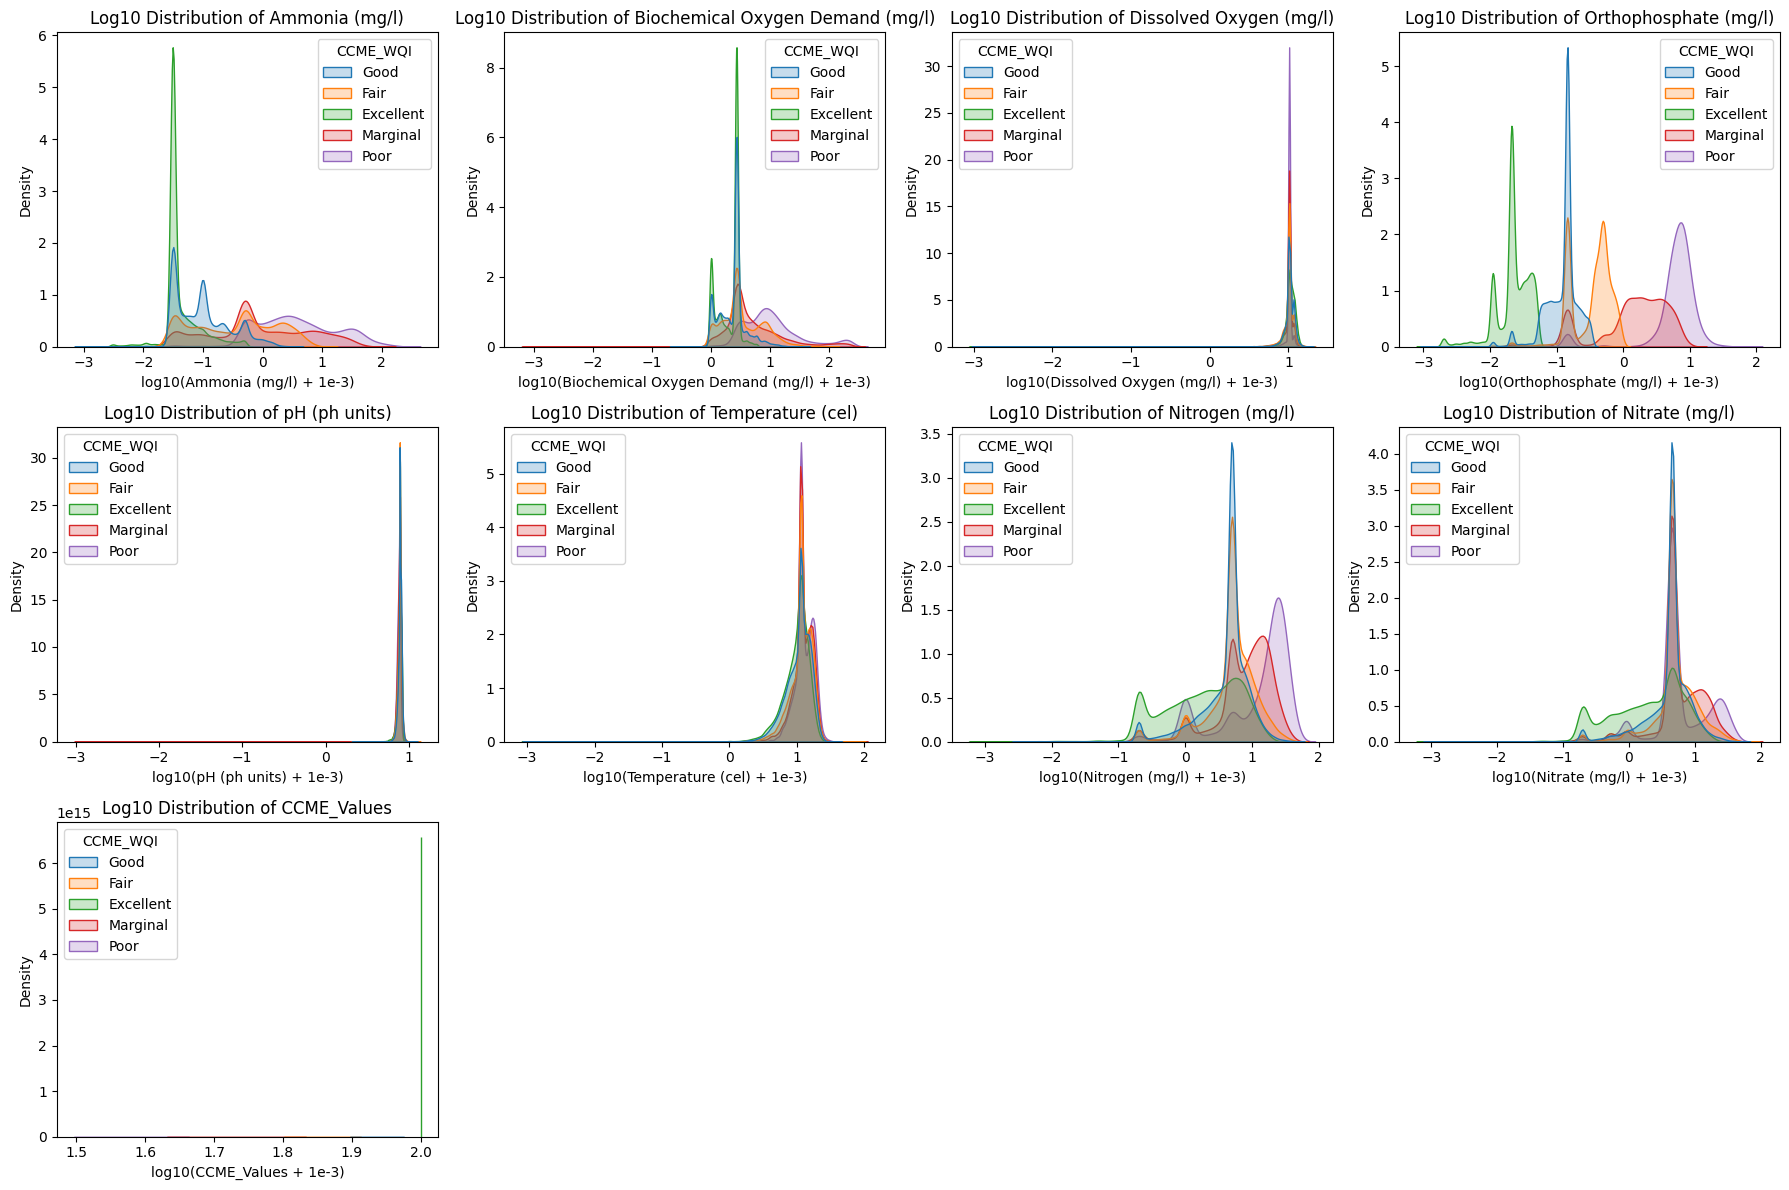

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_cols = england_df.select_dtypes(include='number').columns

plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols, start=1):
    # evitar errores con log(0)
    values = england_df[col] + 1e-3
    values = values[values > 0]  # solo valores positivos
    if values.empty:
        continue

    plt.subplot(3, 4, i)
    sns.kdeplot(
        x=np.log10(values),
        hue=england_df.loc[values.index, 'CCME_WQI'],
        fill=True,
        warn_singular=False,
        common_norm=False
    )
    plt.title(f'Log10 Distribution of {col}')
    plt.xlabel(f'log10({col} + 1e-3)')
    plt.tight_layout()

plt.show()


In [16]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# numeric_cols = england_df.select_dtypes(include='number').columns

# plt.figure(figsize=(15, 10))
# for i, col in enumerate(numeric_cols, start=1):
#     plt.subplot(3, 3, i)
#     sns.kdeplot(data=england_df, x=col, hue='CCME_WQI', fill=True, warn_singular=False)
#     plt.title(f'Distribution of {col}')
#     plt.tight_layout()


In [17]:
england_df.describe()

,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.507919,5.929006,10.223282,0.908222,7.728155,11.590807,6.624348,5.558423,80.786909
std,6.475827,18.538242,1.568117,2.184512,0.460262,4.162183,6.495561,5.114310,18.109196
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,32.146838
25%,0.030000,1.820000,10.100000,0.056000,7.520000,8.800000,2.480000,2.980000,70.333677
50%,0.098000,2.700000,10.200000,0.144000,7.780000,11.460000,5.000000,4.500000,88.761037
75%,0.500000,3.500000,10.900000,0.439000,7.990000,14.250000,7.980000,6.160000,93.069480
max,200.000000,255.000000,19.900000,76.000000,13.500000,95.900000,46.000000,71.700000,100.000000


(array([  202.,  6678.,  6551.,  4217.,  4175.,  5502.,  8080., 11227.,
        32382., 20986.]),
 array([ 32.14683823,  38.93215441,  45.71747058,  52.50278676,
         59.28810294,  66.07341911,  72.85873529,  79.64405147,
         86.42936765,  93.21468382, 100.        ]),
 <BarContainer object of 10 artists>)

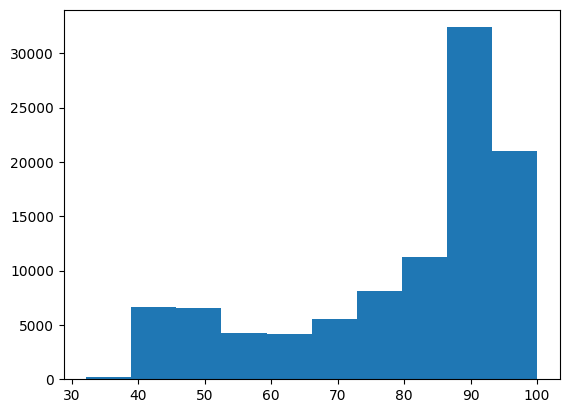

In [18]:
plt.hist(england_df["CCME_Values"])

In [19]:
england_df.columns = [col.strip().lower().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for col in england_df.columns]



# Define features and target
feature_cols = [
    'ammonia_mg_l',
    'biochemical_oxygen_demand_mg_l',
    'dissolved_oxygen_mg_l',
    'orthophosphate_mg_l',
    'ph_ph_units',
    'temperature_cel',
    'nitrogen_mg_l',
    'nitrate_mg_l'
]

##### Binary - Clasification 


In [20]:

england_df['wqi_binary'] = england_df['ccme_wqi'].apply(lambda x: 1 if x in ['Excellent', 'Good'] else 0)

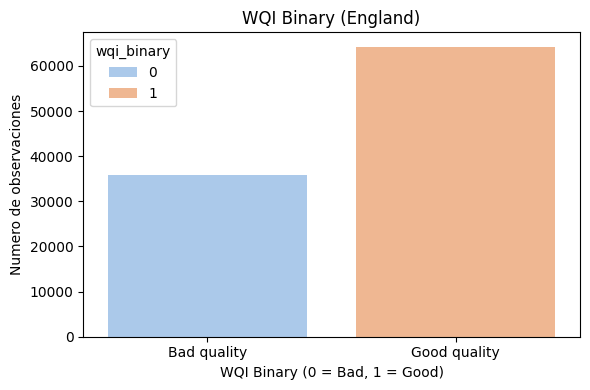

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram (countplot) for the binary target in Canada before prediction
plt.figure(figsize=(6, 4))
sns.countplot(data=england_df, x='wqi_binary', palette='pastel',hue='wqi_binary')

plt.title('WQI Binary (England)')
plt.xlabel('WQI Binary (0 = Bad, 1 = Good)')
plt.ylabel('Numero de observaciones')
plt.xticks([0, 1], ['Bad quality', 'Good quality'])
plt.tight_layout()
plt.show()


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from collections import Counter
from sklearn.ensemble import GradientBoostingClassifier

X = england_df[feature_cols]
y = england_df['wqi_binary']
class_counts = Counter(y)
scale_ratio = class_counts[0] / class_counts[1]
# model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
# model = RandomForestClassifier(class_weight='balanced', random_state=42)
# model = GradientBoostingClassifier(random_state=42)



model = XGBClassifier(
    scale_pos_weight=scale_ratio,
    eval_metric='logloss',
    random_state=42)



pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', model)
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1_macro')

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

scores.mean(), report, conf_matrix

(0.9967030080626408,
 {'0': {'precision': 0.995380739081747,
   'recall': 0.9942673378076062,
   'f1-score': 0.99482372691662,
   'support': 7152.0},
  '1': {'precision': 0.9968108276291225,
   'recall': 0.997431506849315,
   'f1-score': 0.9971210706504824,
   'support': 12848.0},
  'accuracy': 0.9963,
  'macro avg': {'precision': 0.9960957833554347,
   'recall': 0.9958494223284606,
   'f1-score': 0.9959723987835511,
   'support': 20000.0},
  'weighted avg': {'precision': 0.996299427964581,
   'recall': 0.9963,
   'f1-score': 0.9962995405312531,
   'support': 20000.0}},
 array([[ 7111,    41],
        [   33, 12815]], dtype=int64))

In [23]:
england_df.head()

,country,area,waterbody_type,date,ammonia_mg_l,biochemical_oxygen_demand_mg_l,dissolved_oxygen_mg_l,orthophosphate_mg_l,ph_ph_units,temperature_cel,nitrogen_mg_l,nitrate_mg_l,ccme_values,ccme_wqi,wqi_binary
0,England,MILTON BROOK D/S MILTON COOMBE,River,18-10-2012,0.0490,2.70,10.70,0.057,7.75,12.80,3.69,3.670,93.163163,Good,1
1,England,MEDWAY EAST FARLEIGH BRIDGE,River,08-04-2009,0.5000,6.00,10.20,0.500,7.78,11.46,4.40,4.500,74.337190,Fair,0
2,England,R WYE AT CARROTS POOL,River,26-08-2005,0.1450,1.00,9.41,0.025,8.11,17.00,0.98,0.931,100.000000,Excellent,1
3,England,MERRIOT STW,Effluent,16-06-2011,1.0000,6.00,8.82,0.327,7.54,16.47,5.75,5.720,75.505154,Fair,0
4,England,DIGGLE BROOK ABOVE CONFLUENCE WITH TAME,River,11-01-2006,0.0607,1.18,12.40,0.020,6.50,6.00,1.41,1.410,100.000000,Excellent,1


#### Multi - Clasificacion 

(array([43254.,     0., 14605.,     0.,     0., 20986.,     0., 15311.,
            0.,  5844.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

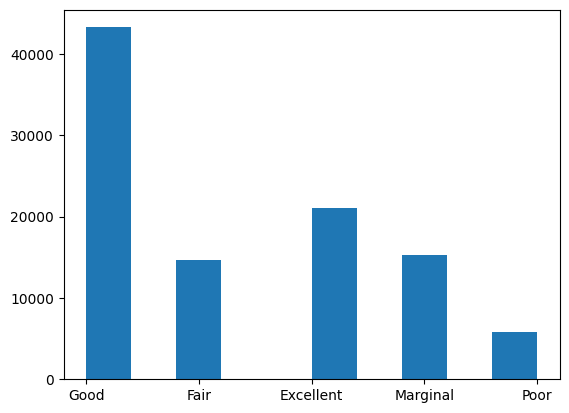

In [24]:
plt.hist(england_df["ccme_wqi"])

In [25]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

y_multi = england_df['ccme_wqi']
X = england_df[feature_cols]

# Orden de categorias
quality_order = [['Poor', 'Marginal', 'Fair', 'Good', 'Excellent']]
oe = OrdinalEncoder(categories=quality_order)

y_array = np.array(y_multi).reshape(-1, 1)
y_encoded = oe.fit_transform(y_array).ravel()

# Modelos 
model = XGBClassifier(random_state=42)
# model = RandomForestClassifier(class_weight='balanced', random_state=42)
# model = GradientBoostingClassifier(random_state=42)

#  Pipeline 
pipeline_multi = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', model)
])

# Cross-validation 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline_multi, X, y_encoded, cv=cv, scoring='f1_macro')

print("Cross-validated F1-macro scores:", scores)
print("Average F1-macro:", np.mean(scores))

# Cross-validated predictions for classification report 
y_pred_cv = cross_val_predict(pipeline_multi, X, y_encoded, cv=cv)

#  Inverse transform 
y_pred_labels_cv = oe.inverse_transform(y_pred_cv.reshape(-1, 1)).ravel()
y_true_labels_cv = oe.inverse_transform(y_encoded.reshape(-1, 1)).ravel()

labels_order = ['Poor', 'Marginal', 'Fair', 'Good', 'Excellent']
print(classification_report(
    y_true_labels_cv,
    y_pred_labels_cv,
    labels=labels_order,
    target_names=labels_order
))


Cross-validated F1-macro scores: [0.98441249 0.9883106  0.98800419 0.9867607  0.98796769]
Average F1-macro: 0.9870911343329001
              precision    recall  f1-score   support

        Poor       0.98      0.98      0.98      5844
    Marginal       0.99      0.98      0.98     15311
        Fair       0.97      0.98      0.98     14605
        Good       1.00      0.99      0.99     43254
   Excellent       0.99      1.00      0.99     20986

    accuracy                           0.99    100000
   macro avg       0.99      0.99      0.99    100000
weighted avg       0.99      0.99      0.99    100000



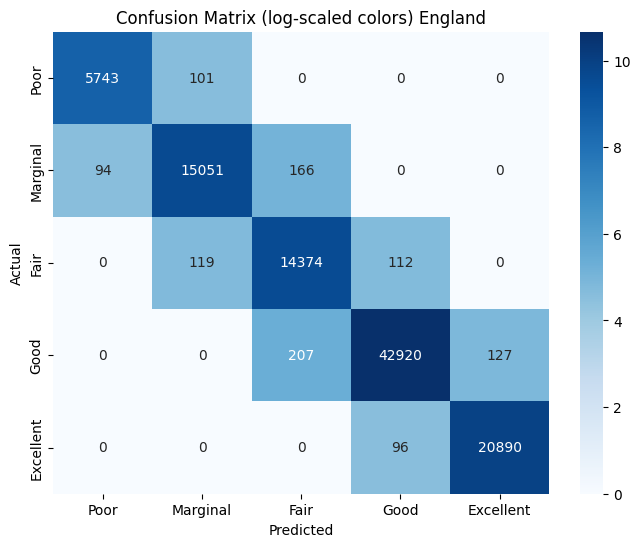

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Confusion Matrix 
cm = confusion_matrix(y_true_labels_cv, y_pred_labels_cv, labels=labels_order)

plt.figure(figsize=(8, 6))
sns.heatmap(
    np.log1p(cm),  # log(1 + x) por evitar log(0)
    annot=cm,
    fmt='d',
    cmap='Blues',
    xticklabels=labels_order,
    yticklabels=labels_order
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (log-scaled colors) England')
plt.show()


In [27]:
# Feature Importance (fit)
pipeline_multi.fit(X, y_encoded)
xgb_model = pipeline_multi.named_steps['classifier']

importances = xgb_model.feature_importances_

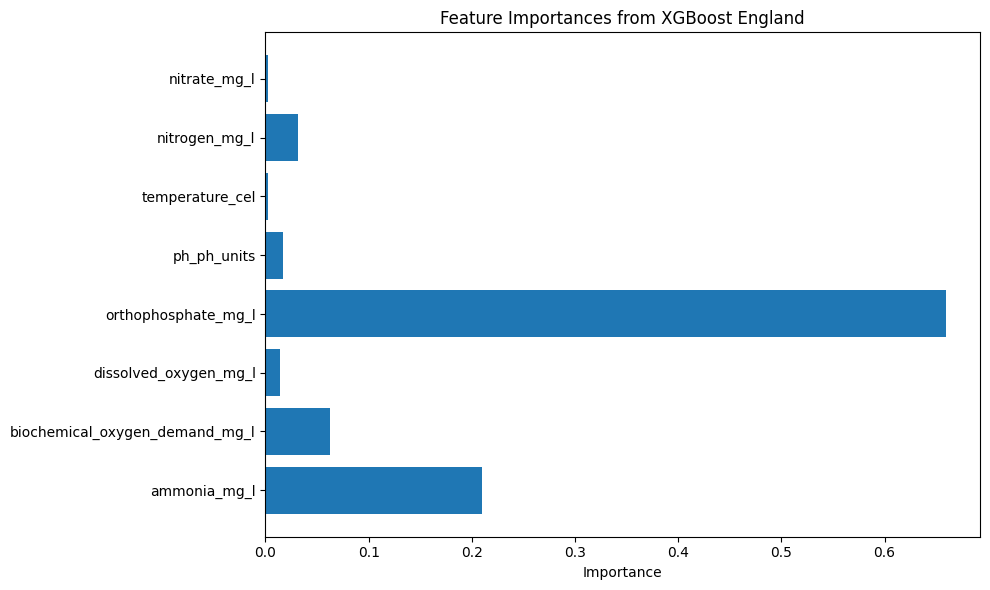

In [28]:

plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances)
plt.yticks(ticks=np.arange(len(X.columns)), labels=X.columns)
plt.xlabel('Importance')
plt.title('Feature Importances from XGBoost England')
plt.tight_layout()
plt.show()

In [29]:
# Predict probabilities for class 0 (Bad water)
y_proba = pipeline.predict_proba(X_test)[:, 0]

# Create alert levels
X_test_alerts = X_test.copy()
X_test_alerts['proba_bad'] = y_proba
X_test_alerts['true_label'] = y_test.values
X_test_alerts['alert_level'] = pd.cut(
    y_proba,
    bins=[0, 0.4, 0.7, 1],
    labels=['Safe', 'Moderate Risk', 'High Risk']
)

# Return top 10 risk cases
X_test_alerts[['proba_bad', 'true_label', 'alert_level']].sort_values(by='proba_bad', ascending=False)


,proba_bad,true_label,alert_level
64896,1.0,0,High Risk
3647,1.0,0,High Risk
31982,1.0,0,High Risk
57018,1.0,0,High Risk
207,1.0,0,High Risk
...,...,...,...
69346,0.0,1,NaN
497,0.0,1,NaN
46566,0.0,1,NaN
92127,0.0,1,NaN


### Regresion 

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Datos
X = england_df[feature_cols]
y = england_df['ccme_values']

# 2. modelos
model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_estimators=100,
    learning_rate=0.1
)

# 3. Pipeline
reg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', model)
])

# 4. Train-test split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Fit & Predict
reg_pipeline.fit(X_train_r, y_train_r)
y_pred_r = reg_pipeline.predict(X_test_r)

mae = mean_absolute_error(y_test_r, y_pred_r)
rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_r))
r2 = r2_score(y_test_r, y_pred_r)

print("=== Test Set Metrics ===")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

=== Test Set Metrics ===
MAE: 0.182
RMSE: 0.495
R²: 0.999


In [31]:
# 7. Cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# R²
cv_r2_scores = cross_val_score(reg_pipeline, X, y, cv=cv, scoring='r2')
print("\n=== Cross-Validated R² Scores ===")
print(np.round(cv_r2_scores, 3))
print("Average R²:", np.mean(cv_r2_scores).round(3))

# MAE (-score)
cv_mae_scores = -cross_val_score(reg_pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error')
print("\n=== Cross-Validated MAE Scores ===")
print(np.round(cv_mae_scores, 3))
print("Average MAE:", np.mean(cv_mae_scores).round(3))


=== Cross-Validated R² Scores ===
[0.999 0.999 0.999 0.999 0.999]
Average R²: 0.999

=== Cross-Validated MAE Scores ===
[0.182 0.193 0.189 0.187 0.183]
Average MAE: 0.187


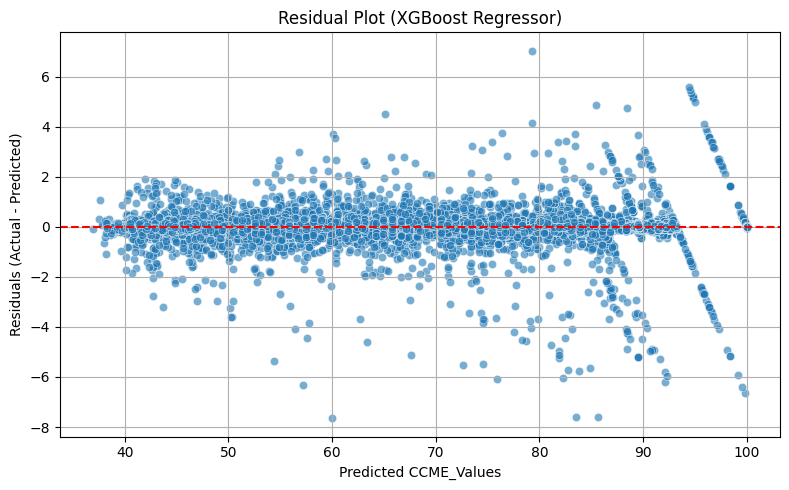

In [32]:
# residuals
residuals = y_test_r - y_pred_r

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_r, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted CCME_Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot (XGBoost Regressor)")
plt.grid(True)
plt.tight_layout()
plt.show()


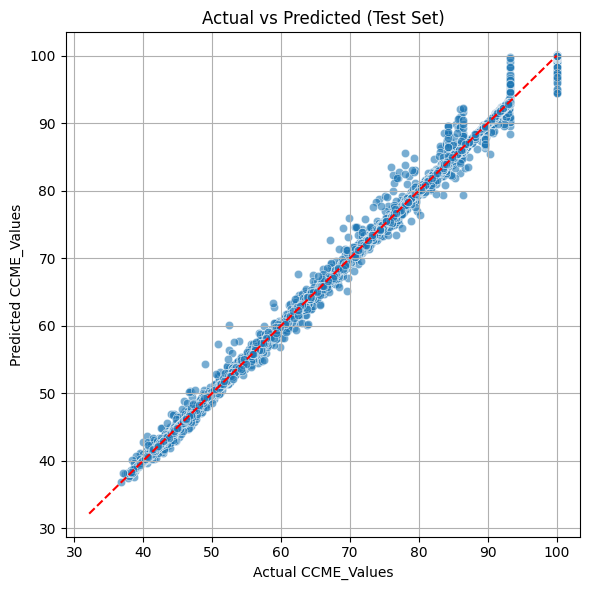

In [33]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_r, y=y_pred_r, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel('Actual CCME_Values')
plt.ylabel('Predicted CCME_Values')
plt.title('Actual vs Predicted (Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Clustering

In [34]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

feature_cols = [
    'ammonia_mg_l',
    'biochemical_oxygen_demand_mg_l',
    'dissolved_oxygen_mg_l',
    'orthophosphate_mg_l',
    'ph_ph_units',
    'temperature_cel',
    'nitrogen_mg_l',
    'nitrate_mg_l'
]

X = england_df[feature_cols]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

silhouette_scores = []


🔹 Mejor número de clusters según Silhouette Score:
k                2.000000
silhouette       0.666112
inertia       3695.406587
Name: 0, dtype: float64


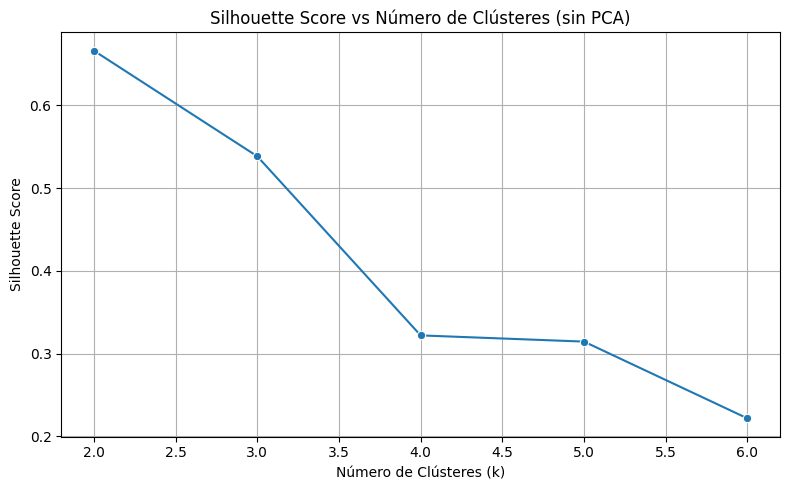

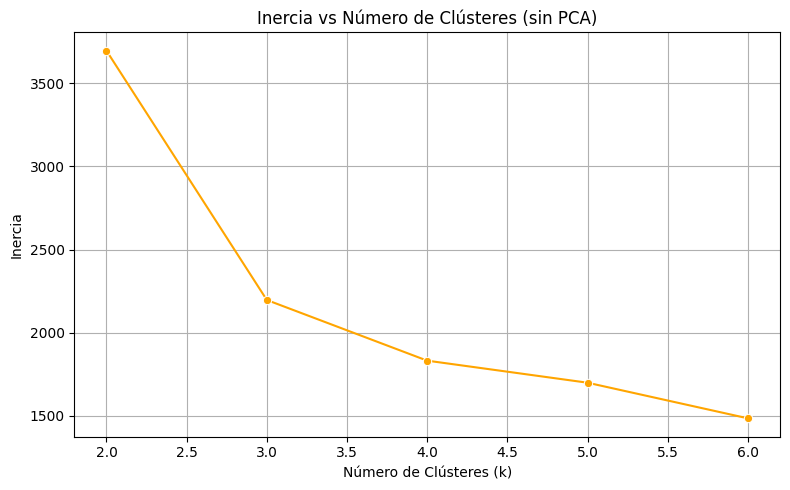

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Rango de valores de k
k_range = range(2, 7)

# Guardar resultados
results = []

# Tamaño de muestra para silhouette (mejor rendimiento)
sample_size = 50000

# Bucle para distintos valores de k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    silhouette = silhouette_score(X_scaled, labels, sample_size=sample_size, random_state=42)
    inertia = kmeans.inertia_

    results.append({
        'k': k,
        'silhouette': silhouette,
        'inertia': inertia
    })

# Convertir resultados a DataFrame
results_df = pd.DataFrame(results)

# Mostrar la mejor combinación
best_result = results_df.loc[results_df['silhouette'].idxmax()]
print("🔹 Mejor número de clusters según Silhouette Score:")
print(best_result)

# Visualización: Silhouette Score
plt.figure(figsize=(8, 5))
sns.lineplot(data=results_df, x='k', y='silhouette', marker='o')
plt.title("Silhouette Score vs Número de Clústeres (sin PCA)")
plt.xlabel("Número de Clústeres (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualización: Inertia
plt.figure(figsize=(8, 5))
sns.lineplot(data=results_df, x='k', y='inertia', marker='o', color='orange')
plt.title("Inercia vs Número de Clústeres (sin PCA)")
plt.xlabel("Número de Clústeres (k)")
plt.ylabel("Inercia")
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
k_optimo = int(best_result['k'])

# Entrenar con todo el X_scaled (100K)
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42)
clusters_final = kmeans_final.fit_predict(X_scaled)

# Añadir etiquetas al DataFrame original
england_df['Cluster'] = clusters_final


In [37]:
feature_cols = [
    'ammonia_mg_l', 'biochemical_oxygen_demand_mg_l',
    'dissolved_oxygen_mg_l', 'orthophosphate_mg_l',
    'ph_ph_units', 'temperature_cel',
    'nitrogen_mg_l', 'nitrate_mg_l'
]


cluster_summary = england_df.groupby('Cluster')[feature_cols].mean().round(2)
print("📊 Medias por variable en cada clúster:")
print(cluster_summary)


📊 Medias por variable en cada clúster:
         ammonia_mg_l  biochemical_oxygen_demand_mg_l  dissolved_oxygen_mg_l  \
Cluster                                                                        
0               22.33                          156.58                  10.12   
1                1.25                            4.08                  10.22   

         orthophosphate_mg_l  ph_ph_units  temperature_cel  nitrogen_mg_l  \
Cluster                                                                     
0                       2.06         7.65            12.21           4.41   
1                       0.89         7.73            11.58           6.65   

         nitrate_mg_l  
Cluster                
0                3.58  
1                5.58  


In [38]:
distribution = pd.crosstab(england_df['Cluster'], england_df['waterbody_type'], normalize='index') * 100
print("Distribución (%) de tipos de cuerpos de agua por clúster:")
print(distribution.round(1))


Distribución (%) de tipos de cuerpos de agua por clúster:
waterbody_type  Canal  Drainage  Effluent  Estuarine  Lake  Marine  River  \
Cluster                                                                     
0                 0.4       3.0      26.7        0.7   1.2     0.0   24.0   
1                 1.4       0.4      28.3        2.4   1.6     0.0   63.8   

waterbody_type  Sea Water  Sewage  
Cluster                            
0                     1.7    42.2  
1                     1.5     0.6  


##### Sewage is wastewater, primarily from households, while effluent is wastewater from industrial or commercial sources, often after some treatment

In [39]:
print("Columnas disponibles:")
print(england_df.columns)


Columnas disponibles:
Index(['country', 'area', 'waterbody_type', 'date', 'ammonia_mg_l',
       'biochemical_oxygen_demand_mg_l', 'dissolved_oxygen_mg_l',
       'orthophosphate_mg_l', 'ph_ph_units', 'temperature_cel',
       'nitrogen_mg_l', 'nitrate_mg_l', 'ccme_values', 'ccme_wqi',
       'wqi_binary', 'Cluster'],
      dtype='object')


In [40]:
print("Columnas disponibles:", england_df.columns)

ccme_summary = england_df.groupby('Cluster')['ccme_values'].agg(['mean', 'median', 'min', 'max', 'count']).round(2)

print("📊 Estadísticas de calidad del agua (CCME Values) por clúster:")
print(ccme_summary)


Columnas disponibles: Index(['country', 'area', 'waterbody_type', 'date', 'ammonia_mg_l',
       'biochemical_oxygen_demand_mg_l', 'dissolved_oxygen_mg_l',
       'orthophosphate_mg_l', 'ph_ph_units', 'temperature_cel',
       'nitrogen_mg_l', 'nitrate_mg_l', 'ccme_values', 'ccme_wqi',
       'wqi_binary', 'Cluster'],
      dtype='object')
📊 Estadísticas de calidad del agua (CCME Values) por clúster:
          mean  median    min     max  count
Cluster                                     
0        47.86    46.0  35.51   68.81   1210
1        81.19    89.2  32.15  100.00  98790


C:\Users\Aggelos\AppData\Local\Temp\ipykernel_17360\2664415356.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=england_df, x='Cluster', y='ccme_values', palette='Set2')


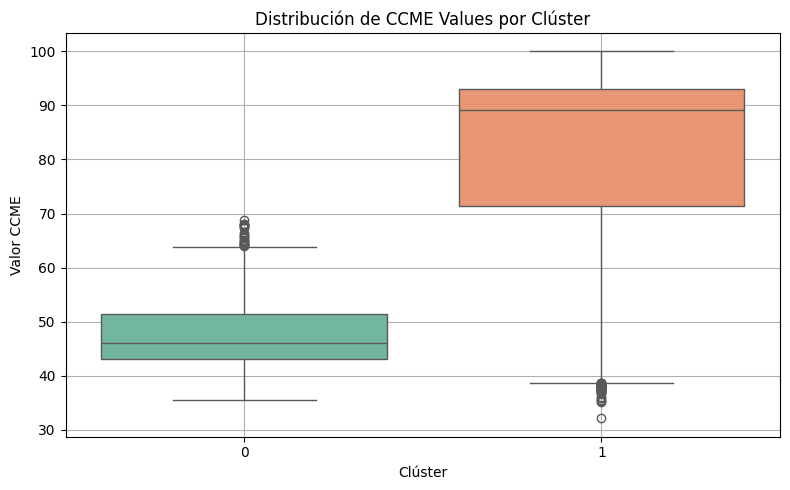

In [41]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=england_df, x='Cluster', y='ccme_values', palette='Set2')
plt.title("Distribución de CCME Values por Clúster")
plt.xlabel("Clúster")
plt.ylabel("Valor CCME")
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler

cluster_summary = england_df.groupby('Cluster')[feature_cols].mean()

scaler = StandardScaler()
normalized_summary = pd.DataFrame(
    scaler.fit_transform(cluster_summary.T),  
    index=cluster_summary.columns,
    columns=[f'Cluster {i}' for i in cluster_summary.index]
)


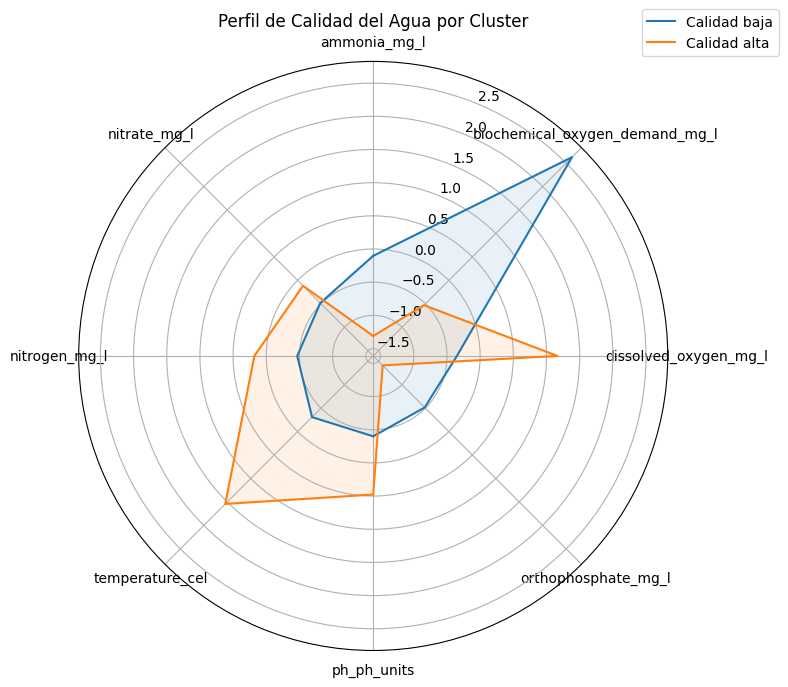

In [43]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define feature columns
feature_cols = [
    'ammonia_mg_l', 'biochemical_oxygen_demand_mg_l',
    'dissolved_oxygen_mg_l', 'orthophosphate_mg_l',
    'ph_ph_units', 'temperature_cel',
    'nitrogen_mg_l', 'nitrate_mg_l'
]

# Group by cluster and calculate the mean for each feature
cluster_summary = england_df.groupby('Cluster')[feature_cols].mean()

# Standardize the transposed cluster summary
scaler = StandardScaler()
standardized = pd.DataFrame(
    scaler.fit_transform(cluster_summary.T),
    index=cluster_summary.columns,
    columns=['Calidad baja', 'Calidad alta']  # Custom labels: cluster 0 = low quality, cluster 1 = high quality
)

# Prepare for radar plot
params = standardized.index.tolist()
num_vars = len(params)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for cluster in standardized.columns:
    values = standardized[cluster].tolist()
    values += values[:1]
    ax.plot(angles, values, label=cluster)
    ax.fill(angles, values, alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), params)

plt.title("Perfil de Calidad del Agua por Cluster")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()


#### LAKE, River etc 

In [44]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# from xgboost import XGBRegressor
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split, cross_val_score, KFold
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # Φόρτωση δεδομένων
# england_df2 = pd.read_csv("data/england_sample100.csv")

# # Επιλογή τύπων
# selected_types = ['River', 'Effluent', 'Estuarine', 'Lake',"Sewage"]
# england_df2 = england_df2[england_df2['Waterbody Type'].isin(selected_types)].copy()

# # Επιλογή χαρακτηριστικών
# feature_cols = [
#     'Ammonia (mg/l)', 'Biochemical Oxygen Demand (mg/l)',
#     'Dissolved Oxygen (mg/l)', 'Orthophosphate (mg/l)',
#     'pH (ph units)', 'Temperature (cel)',
#     'Nitrogen (mg/l)', 'Nitrate (mg/l)'
# ]

# # Λίστα για αποτελέσματα
# results = []

# # Εκπαίδευση και αξιολόγηση ανά τύπο
# for wtype in selected_types:
#     subset = england_df2[england_df2['Waterbody Type'] == wtype].copy()
#     X = subset[feature_cols]
#     y = subset['CCME_Values']
    
#     # Έλεγχος για missing values
#     if X.isnull().any().any() or y.isnull().any():
#         continue  # Παράλειψη τύπου με NaNs
    
#     # Pipeline με XGBoost
#     model = XGBRegressor(
#         objective='reg:squarederror',
#         random_state=42,
#         n_estimators=100,
#         learning_rate=0.1
#     )
#     reg_pipeline = Pipeline([
#         ('scaler', StandardScaler()),
#         ('regressor', model)
#     ])
    
#     # Train/test split
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
#     # Fit
#     reg_pipeline.fit(X_train, y_train)
#     y_pred = reg_pipeline.predict(X_test)

#     # Metrics
#     mae = mean_absolute_error(y_test, y_pred)
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     r2 = r2_score(y_test, y_pred)

#     # Cross-validation (R²)
#     cv = KFold(n_splits=5, shuffle=True, random_state=42)
#     cv_r2_scores = cross_val_score(reg_pipeline, X, y, cv=cv, scoring='r2')
    
#     # Feature importances
#     importances = reg_pipeline.named_steps['regressor'].feature_importances_
#     feat_imp = pd.DataFrame({
#         'Waterbody Type': wtype,
#         'Feature': feature_cols,
#         'Importance': importances
#     })

#     results.append({
#         'Waterbody Type': wtype,
#         'MAE': mae,
#         'RMSE': rmse,
#         'R2': r2,
#         'CV R2 Mean': cv_r2_scores.mean(),
#         'CV R2 Std': cv_r2_scores.std(),
#         'Feature Importances': feat_imp
#     })

# performance_df = pd.DataFrame([{
#     'Waterbody Type': r['Waterbody Type'],
#     'MAE': r['MAE'],
#     'RMSE': r['RMSE'],
#     'R2': r['R2'],
#     'CV R2 Mean': r['CV R2 Mean'],
#     'CV R2 Std': r['CV R2 Std']
# } for r in results])

# performance_df

In [45]:
# from IPython.display import display
# display(results)

In [46]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# england_df2 = pd.read_csv("data/england_sample100.csv")

# selected_types = ['River', 'Effluent', 'Sewage', 'Lake']
# england_df2 = england_df2[england_df2['Waterbody Type'].isin(selected_types)].copy()

# feature_cols = [
#     'Ammonia (mg/l)', 'Biochemical Oxygen Demand (mg/l)',
#     'Dissolved Oxygen (mg/l)', 'Orthophosphate (mg/l)',
#     'pH (ph units)', 'Temperature (cel)',
#     'Nitrogen (mg/l)', 'Nitrate (mg/l)'
# ]

# X = england_df2[feature_cols].copy()
# y_type = england_df2['Waterbody Type']  

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)


# kmeans = KMeans(n_clusters=4, random_state=42)
# clusters = kmeans.fit_predict(X_scaled)

# #  DataFrame por  plotting
# pca_df = pd.DataFrame(X_scaled, columns=feature_cols)
# pca_df['Cluster'] = clusters
# pca_df['Waterbody Type'] = y_type.values

# # Plot: Clusters vs Waterbody Types
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', style='Waterbody Type', palette='tab10')
# plt.title("Clustering (KMeans) con PCA - per Cluster")
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()


In [47]:
# comparison_df_sample

In [48]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import silhouette_score

# england_df = pd.read_csv("data/england_sample100.csv")

# selected_types = ['River', 'Effluent', 'Estuarine', 'Lake']
# england_df = england_df[england_df['Waterbody Type'].isin(selected_types)].copy()

# feature_cols = [
#     'Ammonia (mg/l)', 'Biochemical Oxygen Demand (mg/l)',
#     'Dissolved Oxygen (mg/l)', 'Orthophosphate (mg/l)',
#     'pH (ph units)', 'Temperature (cel)',
#     'Nitrogen (mg/l)', 'Nitrate (mg/l)'
# ]

# sampled_df = england_df.sample(n=20000, random_state=42)

# X_sample = sampled_df[feature_cols].copy()
# scaler = StandardScaler()
# X_scaled_sample = scaler.fit_transform(X_sample)

# # 3 clusters
# kmeans_final = KMeans(n_clusters=3, random_state=42)
# clusters_final = kmeans_final.fit_predict(X_scaled_sample)

# # DataFrame por plotting
# pca_result_df = pd.DataFrame(X_scaled_sample, columns=feature_cols)
# pca_result_df['Cluster'] = clusters_final
# pca_result_df['Waterbody Type'] = sampled_df['Waterbody Type'].values

# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=pca_result_df, hue='Cluster', style='Waterbody Type', palette='tab10')
# plt.title("Clustering con Clusters=3")
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()


In [49]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# england_df2 = pd.read_csv("data/england_sample100.csv")

# selected_types = ['River', 'Effluent', 'Estuarine', 'Lake',"Sewage"]
# england_df2 = england_df2[england_df2['Waterbody Type'].isin(selected_types)].copy()

# feature_cols = [
#     'Ammonia (mg/l)', 'Biochemical Oxygen Demand (mg/l)',
#     'Dissolved Oxygen (mg/l)', 'Orthophosphate (mg/l)',
#     'pH (ph units)', 'Temperature (cel)',
#     'Nitrogen (mg/l)', 'Nitrate (mg/l)'
# ]


# X_sample = england_df2[feature_cols].copy()
# scaler = StandardScaler()
# X_scaled_sample = scaler.fit_transform(X_sample)

# kmeans_final = KMeans(n_clusters=2, random_state=42)
# clusters_final = kmeans_final.fit_predict(X_scaled_sample)

# pca_result_df = pd.DataFrame(X_scaled_sample, columns=feature_cols)
# pca_result_df['Cluster'] = clusters_final
# pca_result_df['Waterbody Type'] = england_df2['Waterbody Type'].values

# cluster_type_counts = pca_result_df.groupby(['Cluster', 'Waterbody Type']).size().unstack(fill_value=0)

# dominant_cluster_per_type = cluster_type_counts.idxmax(axis=0)
# dominant_cluster_per_type.name = 'Dominant Cluster'

# cluster_type_counts_with_dominance = cluster_type_counts.copy()
# cluster_type_counts_with_dominance.loc['Dominant Cluster'] = dominant_cluster_per_type

# cluster_type_counts_with_dominance


In [50]:
# pca_result_df.groupby("Cluster").describe()

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

england_df2 = pd.read_csv("data/england_sample100.csv")

feature_cols = [
    'Ammonia (mg/l)', 'Biochemical Oxygen Demand (mg/l)',
    'Dissolved Oxygen (mg/l)', 'Orthophosphate (mg/l)',
    'pH (ph units)', 'Temperature (cel)',
    'Nitrogen (mg/l)', 'Nitrate (mg/l)', 'CCME_Values'
]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(england_df2[feature_cols[:-1]])  # excluding CCME_Values

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

england_df2['Cluster'] = clusters

cluster_means = england_df2.groupby('Cluster')[feature_cols].mean()
cluster_means

,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values
Cluster,,,,,,,,,
0,32.169434,111.876524,10.098478,3.116589,7.601404,12.706412,4.399643,3.729349,45.830178
1,0.940171,3.967214,10.225593,0.867331,7.730502,11.570149,6.665542,5.592291,81.434190


### Time Series for whole England 


ADF para residuales


{'ADF Statistic': -8.037485218685404,
 'p-value': 1.8855901009850266e-12,
 'Used Lags': 16,
 'N Obs': 257,
 'Critical Values': {'1%': -3.4560535712549925,
  '5%': -2.8728527662442334,
  '10%': -2.5727985212493754},
 'Stationary': True}

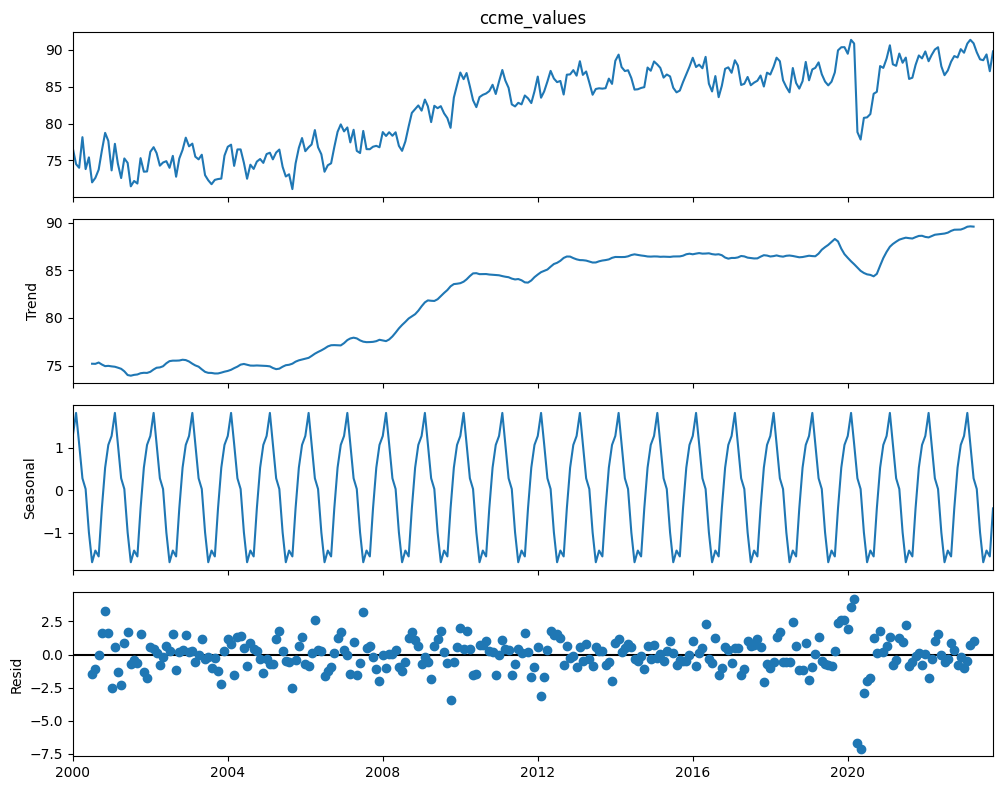

In [52]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Load and clean the data
df = pd.read_csv("data/england_sample100.csv")
df.columns = [col.strip().lower().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for col in df.columns]


# Convert date and extract month-year
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y", errors='coerce')
df['month_year'] = df['date'].dt.to_period('M')

# Create monthly average time series
effluent_ts = df.groupby('month_year')['ccme_values'].mean().dropna()
effluent_ts.index = effluent_ts.index.to_timestamp()

# Decompose the series
decomp = seasonal_decompose(effluent_ts, model='additive', period=12)
residual = decomp.resid.dropna()

# Apply ADF test on the residual
adf_result_resid = adfuller(residual)
adf_output_resid = {
    "ADF Statistic": adf_result_resid[0],
    "p-value": adf_result_resid[1],
    "Used Lags": adf_result_resid[2],
    "N Obs": adf_result_resid[3],
    "Critical Values": adf_result_resid[4],
    "Stationary": adf_result_resid[1] < 0.05
}

# Plot decomposition
fig = decomp.plot()
fig.set_size_inches(10, 8)
plt.tight_layout()

print("ADF para residuales")
adf_output_resid

=== ADF Test – Serie original ===
ADF Statistic: -0.4737
p-value: 0.8971
Stationary: No
Critical Values:
   1%: -3.4544
   5%: -2.8721
   10%: -2.5724


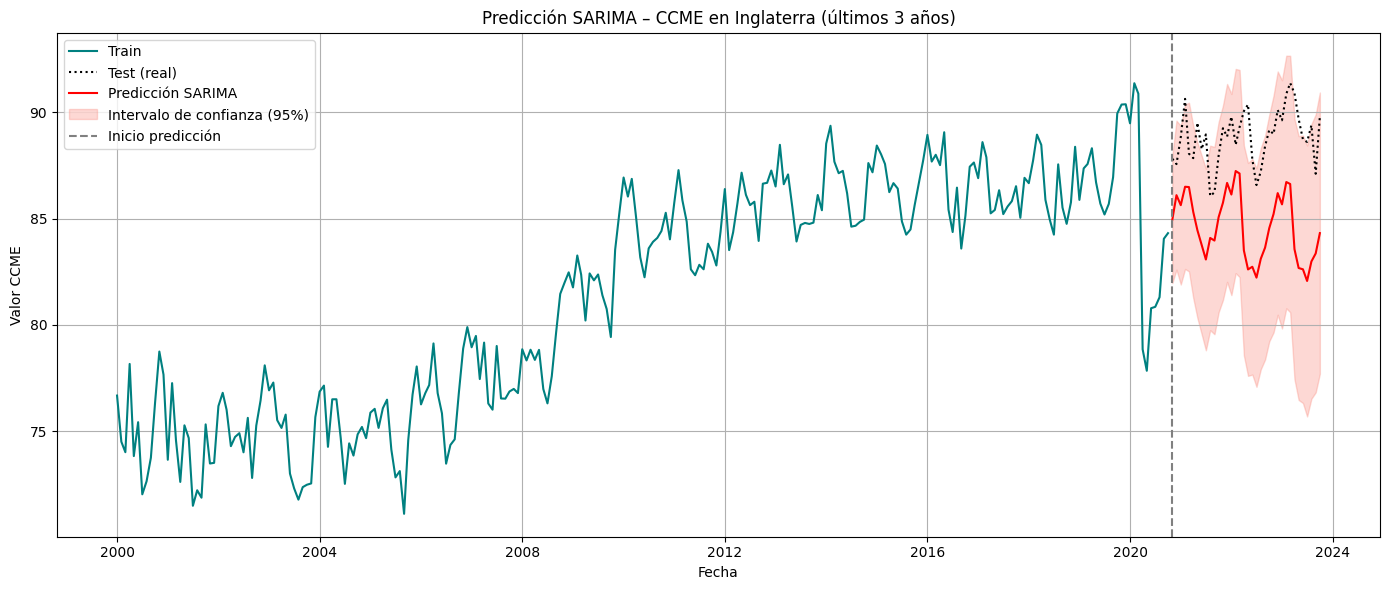

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Cargar y preparar los datos
dfw = pd.read_csv('data/england_sample100.csv')

# Normalizar nombres de columnas
dfw.columns = [col.strip().lower().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for col in dfw.columns]

# Convertir 'date' a datetime y crear columna 'month'
dfw['date'] = pd.to_datetime(dfw['date'], format="%d-%m-%Y", errors='coerce')
dfw['month'] = dfw['date'].dt.to_period('M')

# Crear serie temporal agrupada por mes
effluent_t2s = dfw.groupby('month')['ccme_values'].mean().dropna()
effluent_t2s.index = effluent_t2s.index.to_timestamp()

# ADF TEST para la serie original
adf_result = adfuller(effluent_t2s)
print("=== ADF Test – Serie original ===")
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
print(f"Stationary: {'Sí' if adf_result[1] < 0.05 else 'No'}")
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value:.4f}")

# # -- ADF TEST para la primera diferencia (si δεν είναι estacionaria) --
# if adf_result[1] >= 0.05:
#     diff_series = effluent_t2s.diff().dropna()
#     adf_diff_result = adfuller(diff_series)
#     print("\n=== ADF Test – Primera diferencia ===")
#     print(f"ADF Statistic: {adf_diff_result[0]:.4f}")
#     print(f"p-value: {adf_diff_result[1]:.4f}")
#     print(f"Stationary: {'Sí' if adf_diff_result[1] < 0.05 else 'No'}")
#     print("Critical Values:")
#     for key, value in adf_diff_result[4].items():
#         print(f"   {key}: {value:.4f}")

# -- División en train/test (últimos 3 años como test) --
cutoff_date = effluent_t2s.index.max() - pd.DateOffset(years=3)
train_ts = effluent_t2s[effluent_t2s.index <= cutoff_date]
test_ts = effluent_t2s[effluent_t2s.index > cutoff_date]

# -- Entrenamiento del modelo SARIMA --
model = sm.tsa.SARIMAX(train_ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),
                       enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

# -- Predicción sobre el test --
forecast = results.get_forecast(steps=len(test_ts))
forecast_mean = forecast.predicted_mean
forecast_mean.index = test_ts.index  # corregir índice para alinearlo con test
conf_int = forecast.conf_int()
conf_int.index = test_ts.index       # corregir también intervalo de confianza

# -- Visualización --
plt.figure(figsize=(14, 6))
plt.plot(train_ts, label='Train', color='teal')
plt.plot(test_ts, label='Test (real)', color='black', linestyle=':')
plt.plot(forecast_mean, label='Predicción SARIMA', color='red')
plt.fill_between(test_ts.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='salmon', alpha=0.3, label='Intervalo de confianza (95%)')
plt.axvline(test_ts.index[0], color='gray', linestyle='--', label='Inicio predicción')
plt.title('Predicción SARIMA – CCME en Inglaterra (últimos 3 años)')
plt.xlabel('Fecha')
plt.ylabel('Valor CCME')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# -- Cálculo de métricas de error --
mae = mean_absolute_error(test_ts, forecast_mean)
mse = mean_squared_error(test_ts, forecast_mean)
rmse = np.sqrt(mse)

print(f"MAE:  {mae:.3f}")
print(f"MSE:  {mse:.3f}")
print(f"RMSE: {rmse:.3f}")


MAE:  4.207
MSE:  20.628
RMSE: 4.542


##### Stationary por los Sewage No utilizado - No terminado

In [55]:
#  Effluent
effluent_df = pd.read_csv('data/england_sample100.csv')
effluent_df.columns = [col.strip().lower().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for col in effluent_df.columns]

effluent_df = effluent_df[effluent_df['waterbody_type'].str.lower() == 'sewage'].copy()

effluent_df['date'] = pd.to_datetime(effluent_df['date'], format="%d-%m-%Y", errors='coerce')
effluent_df['month_year'] = effluent_df['date'].dt.to_period('M')
effluent_ts = effluent_df.groupby('month_year')['ccme_values'].mean().dropna()
effluent_ts.index = effluent_ts.index.to_timestamp()

adf_result_effluent = adfuller(effluent_ts)
adf_output_effluent = {
    "ADF Statistic": adf_result_effluent[0],
    "p-value": adf_result_effluent[1],
    "Used Lags": adf_result_effluent[2],
    "N Obs": adf_result_effluent[3],
    "Critical Values": adf_result_effluent[4],
    "Stationary": adf_result_effluent[1] < 0.05
}

adf_output_effluent


{'ADF Statistic': -8.539548672592788,
 'p-value': 9.867937369569398e-14,
 'Used Lags': 1,
 'N Obs': 241,
 'Critical Values': {'1%': -3.4577787098622674,
  '5%': -2.873608704758507,
  '10%': -2.573201765981991},
 'Stationary': True}

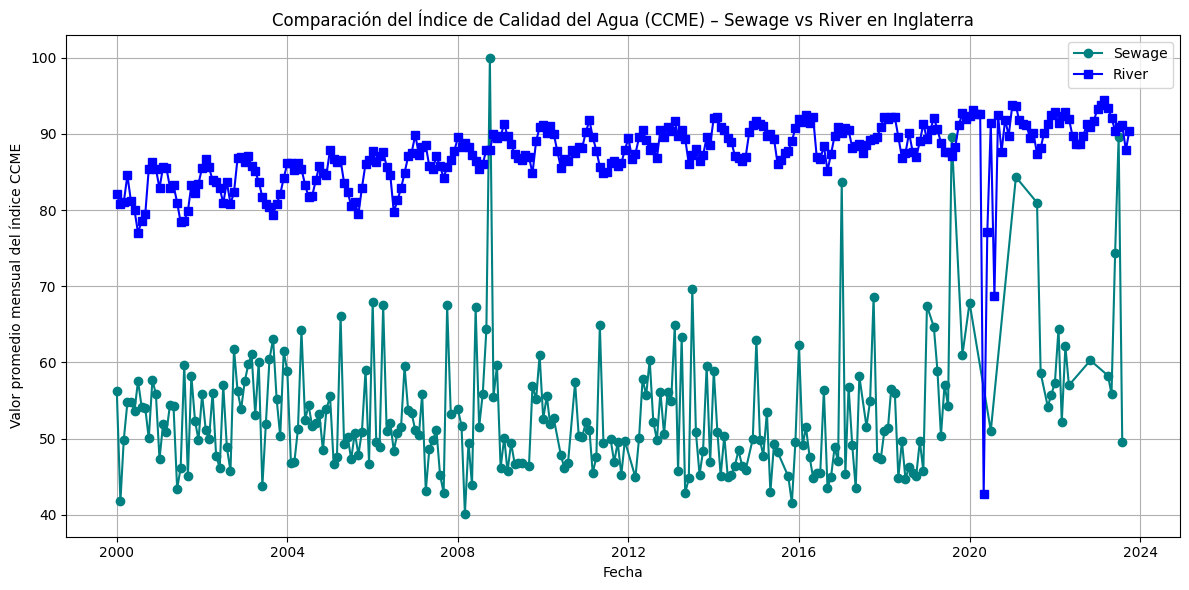

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# -- Cargar y preparar los datos --
df = pd.read_csv('data/england_sample100.csv')

# Limpiar y estandarizar nombres de columnas
df.columns = [col.strip().lower().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for col in df.columns]

# Convertir la columna 'date' a formato datetime
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y", errors='coerce')

# Crear columna con año y mes para agrupar mensualmente
df['month'] = df['date'].dt.to_period('M')

# Filtrar los datos para 'sewage' y 'river'
sewage_df = df[df['waterbody_type'].str.lower() == 'sewage']
river_df = df[df['waterbody_type'].str.lower() == 'river']

# Agrupar por mes y calcular la media mensual del índice CCME
sewage_ts = sewage_df.groupby('month')['ccme_values'].mean().dropna()
river_ts = river_df.groupby('month')['ccme_values'].mean().dropna()

# Convertir el índice de Period a Timestamp para poder graficar
sewage_ts.index = sewage_ts.index.to_timestamp()
river_ts.index = river_ts.index.to_timestamp()

# -- Visualización --
plt.figure(figsize=(12, 6))

# Graficar la serie temporal de sewage
plt.plot(sewage_ts.index, sewage_ts.values, label='Sewage', color='teal', marker='o')

# Graficar la serie temporal de river
plt.plot(river_ts.index, river_ts.values, label='River', color='blue', marker='s')

# Títulos y etiquetas
plt.title('Comparación del Índice de Calidad del Agua (CCME) – Sewage vs River en Inglaterra')
plt.xlabel('Fecha')
plt.ylabel('Valor promedio mensual del índice CCME')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Time Series No ulitizado - No terminado

In [57]:
# import statsmodels.api as sm
# effluent_df = effluent_df[effluent_df['waterbody_type'].str.lower() == 'sewage'].copy()

# model_effluent = sm.tsa.SARIMAX(
#     effluent_ts,
#     order=(1, 1, 1),
#     seasonal_order=(1, 1, 1, 12),
# )
# results_effluent = model_effluent.fit(disp=False)

# forecast_effluent = results_effluent.get_forecast(steps=48)
# forecast_index_effluent = pd.date_range(start=effluent_ts.index[-1] + pd.offsets.MonthBegin(1), periods=48, freq='MS')
# forecast_mean_effluent = forecast_effluent.predicted_mean
# forecast_ci_effluent = forecast_effluent.conf_int()
# forecast_ci_effluent.index = forecast_index_effluent

# x = forecast_index_effluent
# y = forecast_mean_effluent.values.astype(float)
# y_lower = forecast_ci_effluent.iloc[:, 0].values.astype(float)
# y_upper = forecast_ci_effluent.iloc[:, 1].values.astype(float)

# plt.figure(figsize=(12, 6))
# plt.plot(effluent_ts.index, effluent_ts, label='Observado', color='teal')
# plt.plot(x, y, color='red', label='SARIMAX Forecast')
# plt.fill_between(x, y_lower, y_upper, color='salmon', alpha=0.3)
# plt.title('SARIMAX Forecast – CCME en Aguas Residuales (Sewage) – England')
# plt.xlabel('Fecha')
# plt.ylabel('Valor CCME')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()
    

In [58]:
# # Librerías necesarias
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# # Cargar y preparar los datos
# df = pd.read_csv("data/england_sample100.csv")
# df.columns = [col.strip().lower().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for col in df.columns]
# df = df[df['waterbody_type'].str.lower() == 'sewage'].copy()
# df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y", errors='coerce')
# df['month_year'] = df['date'].dt.to_period('M')
# effluent_ts = df.groupby('month_year')['ccme_values'].mean().dropna()
# effluent_ts.index = effluent_ts.index.to_timestamp()

# # Descomposición estacional
# decomp = seasonal_decompose(effluent_ts, model='additive', period=12)
# seasonal = decomp.seasonal.dropna()

# # Predicción SARIMA (supervisada) para los últimos 3 años
# cutoff_date_seasonal = seasonal.index.max() - pd.DateOffset(years=3)
# train_seasonal = seasonal[seasonal.index <= cutoff_date_seasonal]
# test_seasonal = seasonal[seasonal.index > cutoff_date_seasonal]

# sarima_seasonal_model = SARIMAX(train_seasonal, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12),
#                                 enforce_stationarity=False, enforce_invertibility=False)
# sarima_seasonal_result = sarima_seasonal_model.fit(disp=False)
# forecast_seasonal_sarima = sarima_seasonal_result.forecast(steps=len(test_seasonal))
# forecast_seasonal_sarima.index = test_seasonal.index

# # Predicción no supervisada (KMeans) para los próximos 3 años
# seasonal_matrix = []
# full_years = sorted(set(seasonal.index.year))[:-1]
# for year in full_years:
#     start = pd.Timestamp(f"{year}-01-01")
#     end = pd.Timestamp(f"{year}-12-31")
#     year_season = seasonal[start:end]
#     if len(year_season) == 12:
#         seasonal_matrix.append(year_season.values)

# seasonal_matrix = np.array(seasonal_matrix)
# scaler = StandardScaler()
# seasonal_scaled = scaler.fit_transform(seasonal_matrix)
# kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
# kmeans.fit(seasonal_scaled)

# last_year = full_years[-1]
# last_year_pattern = seasonal[seasonal.index.year == last_year].values.reshape(1, -1)
# cluster_mean_pattern = seasonal_matrix.mean(axis=0)  # patrón promedio

# forecast_unsupervised = np.tile(cluster_mean_pattern, 3)
# unsup_start_date = effluent_ts.index.max() + pd.DateOffset(months=1)
# forecast_index_unsup = pd.date_range(start=unsup_start_date, periods=36, freq='ME')
# forecast_series_unsupervised = pd.Series(forecast_unsupervised, index=forecast_index_unsup)

# # Visualización y guardado del gráfico
# plt.figure(figsize=(14, 6))
# plt.plot(seasonal[seasonal.index >= pd.Timestamp("2015-01-01")],
#          label='Componente estacional histórica', color='blue')
# plt.plot(forecast_seasonal_sarima, label='Predicción SARIMA (últimos 3 años)', color='green')
# plt.plot(test_seasonal, label='Estacional real (últimos 3 años)', color='orange', linestyle=':')
# plt.plot(forecast_series_unsupervised, label='Predicción no supervisada (después del dataset)', color='red', linestyle='--')
# plt.axvline(forecast_seasonal_sarima.index[0], color='gray', linestyle='--', label='Inicio predicción SARIMA')
# plt.axvline(forecast_series_unsupervised.index[0], color='black', linestyle='--', label='Inicio predicción no supervisada')

# # Formato del eje x: mostrar cada año
# plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
# plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

# plt.title("Predicción SARIMA(Sewage) vs Real y Predicción no supervisada sobre componente estacional")
# plt.xlabel("Año")
# plt.ylabel("Valor estacional")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()

# # Guardar la figura en archivo PNG (300 dpi)
# plt.savefig("data/seasonal_forecast_comparison_sewage2.png", dpi=300)
# plt.show()


In [59]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error

# mae = mean_absolute_error(test_seasonal, forecast_seasonal_sarima)
# rmse = np.sqrt(mean_squared_error(test_seasonal, forecast_seasonal_sarima))
# print(f"MAE: {mae:.12f}, RMSE: {rmse:.12f}")


##### Metrcicas del supervisado (Sewage) No terminado- No utilizado

In [60]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# import numpy as np

# # Métricas para SARIMA
# mse_sarima = mean_squared_error(test_seasonal, forecast_seasonal_sarima)
# rmse_sarima = np.sqrt(mse_sarima)
# mae_sarima = mean_absolute_error(test_seasonal, forecast_seasonal_sarima)

# print("SARIMA:")
# print(f"MSE: {mse_sarima:.12f}")
# print(f"RMSE: {rmse_sarima:.12f}")
# print(f"MAE: {mae_sarima:.12f}")


##### Metrcicas del no supervisado (Sewage)  No terminado- No utilizado

In [61]:
# actual_last3 = seasonal[forecast_seasonal_sarima.index[0]:forecast_seasonal_sarima.index[-1]]

# # Métricas para NO supervisado
# mse_unsup = mean_squared_error(actual_last3, forecast_series_unsupervised[:len(actual_last3)])
# rmse_unsup = np.sqrt(mse_unsup)
# mae_unsup = mean_absolute_error(actual_last3, forecast_series_unsupervised[:len(actual_last3)])

# print("\nNO Supervisado:")
# print(f"MSE: {mse_unsup:.4f}")
# print(f"RMSE: {rmse_unsup:.4f}")
# print(f"MAE: {mae_unsup:.4f}")


### Time Series (River)  No terminado- No utilizado

In [62]:
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.seasonal import seasonal_decompose
# import matplotlib.pyplot as plt

# # Load and clean the data
# df = pd.read_csv("data/england_sample100.csv")
# df.columns = [col.strip().lower().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for col in df.columns]

# # Filter effluent type
# df = df[df['waterbody_type'].str.lower() == 'river'].copy()

# # Convert date and extract month-year
# df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y", errors='coerce')
# df['month_year'] = df['date'].dt.to_period('M')

# # Create monthly average time series
# river_ts = df.groupby('month_year')['ccme_values'].mean().dropna()
# river_ts.index = river_ts.index.to_timestamp()

# # Decompose the series
# decomp = seasonal_decompose(river_ts, model='additive', period=12)
# river = decomp.resid.dropna()

# # Apply ADF test on the residual
# adf_result_river = adfuller(river)
# adf_output_river = {
#     "ADF Statistic": adf_result_river[0],
#     "p-value": adf_result_river[1],
#     "Used Lags": adf_result_river[2],
#     "N Obs": adf_result_river[3],
#     "Critical Values": adf_result_river[4],
#     "Stationary": adf_result_river[1] < 0.05
# }

# # Plot decomposition
# fig = decomp.plot()
# fig.set_size_inches(10, 8)
# plt.tight_layout()

# adf_output_river


In [63]:
# # -- Librerías necesarias --
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# # -- Cargar y preparar los datos --
# df = pd.read_csv("data/england_sample100.csv")
# df.columns = [col.strip().lower().replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_") for col in df.columns]
# df = df[df['waterbody_type'].str.lower() == 'river'].copy()
# df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y", errors='coerce')
# df['month_year'] = df['date'].dt.to_period('M')
# river_ts = df.groupby('month_year')['ccme_values'].mean().dropna()
# river_ts.index = river_ts.index.to_timestamp()

# # -- Descomposición estacional --
# decomp = seasonal_decompose(river_ts, model='additive', period=12)
# seasonal = decomp.seasonal.dropna()

# # -- Predicción SARIMA (supervisada) para los últimos 3 años --
# cutoff_date_seasonal = seasonal.index.max() - pd.DateOffset(years=3)
# train_seasonal = seasonal[seasonal.index <= cutoff_date_seasonal]
# test_seasonal = seasonal[seasonal.index > cutoff_date_seasonal]

# sarima_seasonal_model = SARIMAX(train_seasonal, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12),
#                                 enforce_stationarity=False, enforce_invertibility=False)
# sarima_seasonal_result = sarima_seasonal_model.fit(disp=False)
# forecast_seasonal_sarima = sarima_seasonal_result.forecast(steps=len(test_seasonal))
# forecast_seasonal_sarima.index = test_seasonal.index

# # -- Predicción no supervisada (KMeans) para los próximos 3 años --
# seasonal_matrix = []
# full_years = sorted(set(seasonal.index.year))[:-1]
# for year in full_years:
#     start = pd.Timestamp(f"{year}-01-01")
#     end = pd.Timestamp(f"{year}-12-31")
#     year_season = seasonal[start:end]
#     if len(year_season) == 12:
#         seasonal_matrix.append(year_season.values)

# seasonal_matrix = np.array(seasonal_matrix)
# scaler = StandardScaler()
# seasonal_scaled = scaler.fit_transform(seasonal_matrix)
# kmeans = KMeans(n_clusters=1, random_state=0, n_init=10)
# kmeans.fit(seasonal_scaled)

# last_year = full_years[-1]
# last_year_pattern = seasonal[seasonal.index.year == last_year].values.reshape(1, -1)
# cluster_mean_pattern = seasonal_matrix.mean(axis=0)  # patrón promedio

# forecast_unsupervised = np.tile(cluster_mean_pattern, 3)
# unsup_start_date = effluent_ts.index.max() + pd.DateOffset(months=1)
# forecast_index_unsup = pd.date_range(start=unsup_start_date, periods=36, freq='ME')
# forecast_series_unsupervised = pd.Series(forecast_unsupervised, index=forecast_index_unsup)

# # -- Visualización y guardado del gráfico --
# plt.figure(figsize=(14, 6))
# plt.plot(seasonal[seasonal.index >= pd.Timestamp("2015-01-01")],
#          label='Componente estacional histórica', color='blue')
# plt.plot(forecast_seasonal_sarima, label='Predicción SARIMA (últimos 3 años)', color='green')
# plt.plot(test_seasonal, label='Estacional real (últimos 3 años)', color='orange', linestyle=':')
# plt.plot(forecast_series_unsupervised, label='Predicción no supervisada (después del dataset)', color='red', linestyle='--')
# plt.axvline(forecast_seasonal_sarima.index[0], color='gray', linestyle='--', label='Inicio predicción SARIMA')
# plt.axvline(forecast_series_unsupervised.index[0], color='black', linestyle='--', label='Inicio predicción no supervisada')

# # Formato del eje x: mostrar cada año
# plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
# plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

# plt.title("Predicción SARIMA(River) vs Real y Predicción no supervisada sobre componente estacional")
# plt.xlabel("Año")
# plt.ylabel("Valor estacional")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()

# # Guardar la figura en archivo PNG (300 dpi)
# plt.savefig("data/seasonal_forecast_comparison_rivers.png", dpi=300)
# plt.show()


In [64]:
# import statsmodels.api as sm

# model_effluent = sm.tsa.SARIMAX(
#     river_ts,
#     order=(1, 1, 1),
#     seasonal_order=(1, 1, 1, 12),
# )
# results_effluent = model_effluent.fit(disp=False)

# forecast_effluent = results_effluent.get_forecast(steps=48)
# forecast_index_effluent = pd.date_range(start=river_ts.index[-1] + pd.offsets.MonthBegin(1), periods=48, freq='MS')
# forecast_mean_effluent = forecast_effluent.predicted_mean
# forecast_ci_effluent = forecast_effluent.conf_int()
# forecast_ci_effluent.index = forecast_index_effluent

# x = forecast_index_effluent
# y = forecast_mean_effluent.values.astype(float)
# y_lower = forecast_ci_effluent.iloc[:, 0].values.astype(float)
# y_upper = forecast_ci_effluent.iloc[:, 1].values.astype(float)

# plt.figure(figsize=(12, 6))
# plt.plot(river_ts.index, river_ts, label='Observado', color='teal')
# plt.plot(x, y, color='red', label='SARIMAX Forecast')
# plt.fill_between(x, y_lower, y_upper, color='salmon', alpha=0.3)
# plt.title('SARIMAX Forecast – CCME en Aguas en los rios (River) – England')
# plt.xlabel('Fecha')
# plt.ylabel('Valor CCME')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [65]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import numpy as np

# # -- Cálculo de errores para SARIMA sobre el componente estacional --
# maeRiv = mean_absolute_error(test_seasonal, forecast_seasonal_sarima)
# mseRiv = mean_squared_error(test_seasonal, forecast_seasonal_sarima)
# rmseRiv = np.sqrt(mseRiv)

# print("🔍 Errores del modelo SARIMA sobre componente estacional (últimos 3 años):")
# print(f"MAE: {maeRiv:.12f}")
# print(f"MSE: {mseRiv:.12f}")
# print(f"RMSE: {rmseRiv:.12f}")


In [66]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import numpy as np

# # -- Extraer patrón real del último año completo --
# last_year = full_years[-1]
# true_pattern = seasonal[seasonal.index.year == last_year].values

# # -- Errores entre patrón real y patrón medio generado por KMeans --
# mae_kmeansRiv = mean_absolute_error(true_pattern, cluster_mean_pattern)
# mse_kmeansRiv = mean_squared_error(true_pattern, cluster_mean_pattern)
# rmse_kmeansRiv = np.sqrt(mse_kmeansRiv)

# print("\n🔍 Errores del modelo NO supervisado (KMeans) sobre el último año real:")
# print(f"MAE: {mae_kmeansRiv:.16f}")
# print(f"MSE: {mse_kmeansRiv:.50f}")
# print(f"RMSE: {rmse_kmeansRiv:.16f}")


In [67]:
river_ts.tail(100)


month
2015-07-01    86.103366
2015-08-01    86.628748
2015-09-01    87.472564
2015-10-01    87.725176
2015-11-01    89.029485
                ...    
2023-06-01    90.390755
2023-07-01    90.874199
2023-08-01    91.186619
2023-09-01    87.853438
2023-10-01    90.436198
Freq: MS, Name: ccme_values, Length: 100, dtype: float64